<a href="https://colab.research.google.com/github/MobileApplicationBeraldi/Queues/blob/main/VM_Core_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

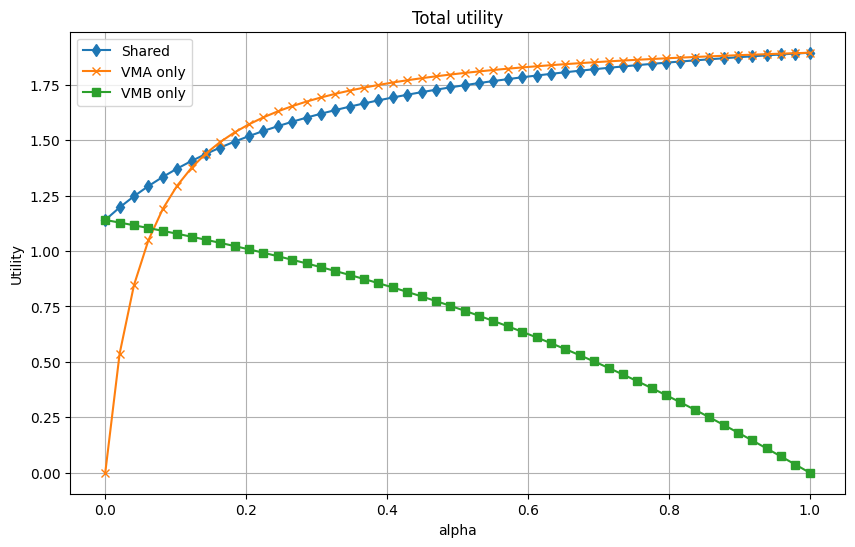

In [17]:
from re import U
import numpy as np
import matplotlib.pyplot as plt

def stationary_probabilities(lambdaA, lambdaB, muA, muB):
    """
    Calcola le probabilità stazionarie per la catena di Markov.

    Parametri:
        lambdaA (float): Tasso di arrivo per la transizione 0 -> A
        lambdaB (float): Tasso di arrivo per le transizioni 0 -> B e B -> 2B
        muA (float): Tasso di servizio per la transizione A -> 0
        muB (float): Tasso di servizio per le transizioni B -> 0 e 2B -> B

    Ritorna:
        dict: Probabilità stazionarie {P0, PB, P2B, PA}
    """
    denom = 2 * lambdaA * muB**2 + lambdaB**2 * muA + 2 * lambdaB * muA * muB + 2 * muA * muB**2

    P0 = 2 * muA * muB**2 / denom
    PB = 2 * lambdaB * muA * muB / denom
    P2B = lambdaB**2 * muA / denom
    PA = 2 * lambdaA * muB**2 / denom

    return {"P0": P0, "PB": PB, "P2B": P2B, "PA": PA,"U":2*PA+PB+2*P2B}

def stationary_probabilities_three_states(lambdaB, muB):
    """
    Calcola le probabilità stazionarie per la catena di Markov con tre stati {0, B, 2B}.

    Parametri:
        lambdaB (float): Tasso di arrivo per le transizioni 0 -> B e B -> 2B
        muB (float): Tasso di servizio per le transizioni B -> 0 e 2B -> B

    Ritorna:
        dict: Probabilità stazionarie {P0, PB, P2B}
    """
    denom = lambdaB**2 + 2 * lambdaB * muB + 2 * muB**2

    P0 = 2 * muB**2 / denom
    PB = 2 * lambdaB * muB / denom
    P2B = lambdaB**2 / denom

    return {"P0": P0, "PB": PB, "P2B": P2B,"U":PB+2*P2B}


def stationary_probabilities_two_states(lambdaA, muA):
    """
    Calcola le probabilità stazionarie per la catena di Markov con due stati {0, A}.

    Parametri:
        lambdaA (float): Tasso di arrivo per la transizione 0 -> A
        muA (float): Tasso di servizio per la transizione A -> 0

    Ritorna:
        dict: Probabilità stazionarie {P0, PA}
    """
    P0 = muA / (lambdaA + muA)
    PA = lambdaA / (lambdaA + muA)

    return {"P0": P0, "PA": PA,"U":2*PA}


# Main
if __name__ == "__main__":
    # Parametri fissi
    l=0.9
    a=0
    lambdaB = (1-a)*l  # Fissiamo un valore per il tasso di arrivo per B
    muA = 0.05      # Fissiamo un valore per il tasso di servizio di A
    muB = 0.5      # Fissiamo un valore per il tasso di servizio di B

    # Vettore di lambdaA (diversi valori per il tasso di arrivo per A)
    alpha_values = np.linspace(0, 1.0, 50)
    # Liste per memorizzare i risultati
    P0_values = []
    PB_values = []
    P2B_values = []
    PA_values = []
    U_values = []
    U2_values = []
    U3_values = []

    for alpha in alpha_values:
        probs = stationary_probabilities(l*alpha, (1-alpha)*lambdaB, muA, muB)
        probs3 = stationary_probabilities_three_states((1-alpha)*lambdaB, muB)
        probs2 = stationary_probabilities_two_states(l*alpha, muA)
        #P0_values.append(probs["P0"])
        #PB_values.append(probs["PB"])
        #P2B_values.append(probs["P2B"])
        #PA_values.append(probs["PA"])
        U_values.append(probs["U"])
        U2_values.append(probs2["U"])
        U3_values.append(probs3["U"])
    # Grafico
    plt.figure(figsize=(10, 6))
    #plt.plot(alpha_values, P0_values, label="P0", marker="o")
    #plt.plot(alpha_values, PB_values, label="PB", marker="x")
    #plt.plot(alpha_values, P2B_values, label="P2B", marker="s")
    #plt.plot(alpha_values, PA_values, label="PA", marker="d")
    plt.plot(alpha_values, U_values, label="Shared", marker="d")
    plt.plot(alpha_values, U2_values, label="VMA only", marker="x")
    plt.plot(alpha_values, U3_values, label="VMB only", marker="s")

    plt.title("Total utility")
    plt.xlabel("alpha")
    plt.ylabel("Utility")
    plt.legend()
    plt.grid(True)
    plt.show()
